# Tree Regression Prediction

In this notebook the amount of trips in an hour is predicted. The used algorithm is the Decision Tree algorithm.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
full_data = pd.read_csv("load_prediction_data.csv", parse_dates=["start_time"])
full_data.head(1)

,start_time,trip_amount,start_hour,start_day,start_month,start_weekday,is_weekend,mean_duration_min,max_temp,precip
0,2017-01-01,4,0,1,1,6,1,9.5,-0.6,0.0


First we take our selected features and our target features out of the full dataset. After that we divide our input features into training, validation and test sets.

In [5]:
X_full = full_data[["start_hour","start_month","start_weekday","is_weekend","max_temp"]]
y_full = full_data["trip_amount"]

# train-test split (30% test 49% train 21% validation)
X_temp, X_test, y_temp, y_test = train_test_split(X_full, y_full, test_size= 0.3, random_state= 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size= 0.3, random_state= 42)

In [19]:
def reg_tree(X, y, depth):
    tree_reg_model = DecisionTreeRegressor(max_depth=depth, criterion="squared_error")
    tree_reg_model.fit(X, y)
    return tree_reg_model

def evaluate(y_true, y_pred):
    print("MSE: " + str(mean_squared_error(y_true, y_pred)))
    print("MAE: " + str(mean_absolute_error(y_true, y_pred)))
    print("R^2: " + str(r2_score(y_true, y_pred)))

model = reg_tree(X_train, y_train, 9)

evaluate(y_valid, model.predict(X_valid))

rcParams['figure.figsize'] = 6, 3.75

MSE: 406.0020610132957
MAE: 12.024263599283593
R^2: 0.8348974955609738


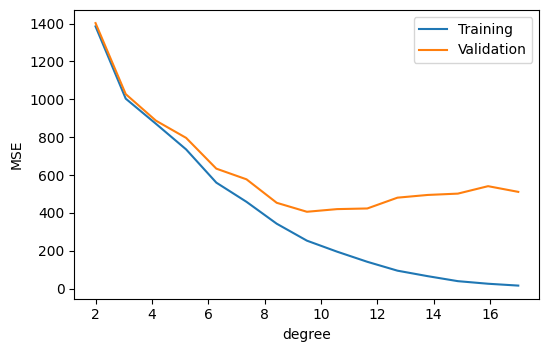

In [21]:
# tune hyperparameter depth
performance_train_set = list()
performance_valid_set = list()

min_depth = 2
max_depth = 16# can take a long time for high numbers (5min for 18)
eval_function = mean_squared_error

for d in range(min_depth, max_depth + 1):
    model = reg_tree(X_train, y_train, d)
    
    y_model = model.predict(X_train, d)
    performance_train_set.append(eval_function(y_train, y_model))

    y_model = model.predict(X_valid, d)
    performance_valid_set.append(eval_function(y_valid, y_model))

plt.plot(np.linspace(min_depth, max_depth+1, max_depth + 1 - min_depth), performance_train_set)
plt.plot(np.linspace(min_depth, max_depth+1, max_depth + 1 - min_depth), performance_valid_set)

plt.legend(["Training", "Validation"])
plt.xlabel("degree")
plt.ylabel("MSE")
plt.show()

In [32]:
import graphviz
model = reg_tree(X_train, y_train, 5)
dot_data = export_graphviz(model, feature_names=["start_hour","start_month","start_weekday","is_weekend","max_temp"])  
    
graph = graphviz.Source(dot_data)
graph.format = 'png'
# graph.render('dtree_render',view=True) # saves as image
graphviz.Source(dot_data)

FileNotFoundError: [Errno 2] No such file or directory: 'xdg-open'